In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify

In [84]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
3,2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
4,2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


# 1. EDA

## a. Overview

In [85]:
df.shape

(97748, 24)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           97748 non-null  int64  
 1   Unnamed: 0             97748 non-null  int64  
 2   trans_date_trans_time  97748 non-null  object 
 3   cc_num                 97748 non-null  int64  
 4   merchant               97748 non-null  object 
 5   category               97748 non-null  object 
 6   amt                    97748 non-null  float64
 7   first                  97748 non-null  object 
 8   last                   97748 non-null  object 
 9   gender                 97748 non-null  object 
 10  street                 97748 non-null  object 
 11  city                   97748 non-null  object 
 12  state                  97748 non-null  object 
 13  zip                    97748 non-null  int64  
 14  lat                    97748 non-null  float64
 15  lo

In [87]:
# All columns of the DataFrame
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [88]:
# Drop the Unnamed column that was the original index column in the csv files (column index 0 and 1)
# Drop the cc_num and trans_num columns as credit numbers are randomly generated by the banks and 
# have no link to whether fraud will be committed
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'cc_num','trans_num'], axis=1, inplace=True)

In [89]:
df.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,97748.000000,97748.000000,97748.000000,97748.000000,9.774800e+04,9.774800e+04,97748.000000,97748.000000,97748.000000
mean,102.832444,48776.833807,38.525509,-90.210550,8.830390e+04,1.349189e+09,38.524928,-90.210050,0.076789
std,217.047969,26937.012679,5.079548,13.799118,2.985310e+05,1.287321e+07,5.114803,13.813079,0.266258
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.654993,0.000000
25%,10.567500,26041.000000,34.668900,-96.790900,7.430000e+02,1.338657e+09,34.749667,-96.864098,0.000000
50%,50.160000,48088.000000,39.342600,-87.458100,2.471000e+03,1.349214e+09,39.349543,-87.391641,0.000000
75%,91.782500,72042.000000,41.894800,-80.128400,2.047800e+04,1.359276e+09,41.944618,-80.207857,0.000000
max,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.980744,1.000000


## b. Handle missing value & duplicate value

In [90]:
# Checking missing data
df.isnull().values.any()

False

In [91]:
# Checking duplicate data
df.duplicated().values.any()

False

=> Data have no missing or duplicated values

## c. Transform data

### Convert trans_date_trans_time to datetime object

### Transform as Hour of transaction

In [92]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S'))

In [93]:
df['tns_hour'] = df['trans_date_trans_time'].apply(lambda x: x.hour)

In [94]:
df[['trans_date_trans_time','tns_hour']].head(5)

,trans_date_trans_time,tns_hour
0,2019-01-02 01:06:37,1
1,2019-01-02 01:47:29,1
2,2019-01-02 03:05:23,3
3,2019-01-02 03:38:03,3
4,2019-01-02 03:55:47,3


### Calculate age

In [95]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

current_date = df['trans_date_trans_time'].max()

def cal_age(dob):
    age = current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day))
    return age

df['age'] = df['dob'].apply(cal_age)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  97748 non-null  datetime64[ns]
 1   merchant               97748 non-null  object        
 2   category               97748 non-null  object        
 3   amt                    97748 non-null  float64       
 4   first                  97748 non-null  object        
 5   last                   97748 non-null  object        
 6   gender                 97748 non-null  object        
 7   street                 97748 non-null  object        
 8   city                   97748 non-null  object        
 9   state                  97748 non-null  object        
 10  zip                    97748 non-null  int64         
 11  lat                    97748 non-null  float64       
 12  long                   97748 non-null  float64       
 13  c

## d. Univariate Analyse

### Numeric columns

In [97]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    print(f"Unique values of {col}: {df[col].nunique()}")

Unique values of amt: 25048
Unique values of zip: 970
Unique values of lat: 968
Unique values of long: 969
Unique values of city_pop: 879
Unique values of unix_time: 97609
Unique values of merch_lat: 97438
Unique values of merch_long: 97627
Unique values of is_fraud: 2
Unique values of tns_hour: 24
Unique values of age: 81


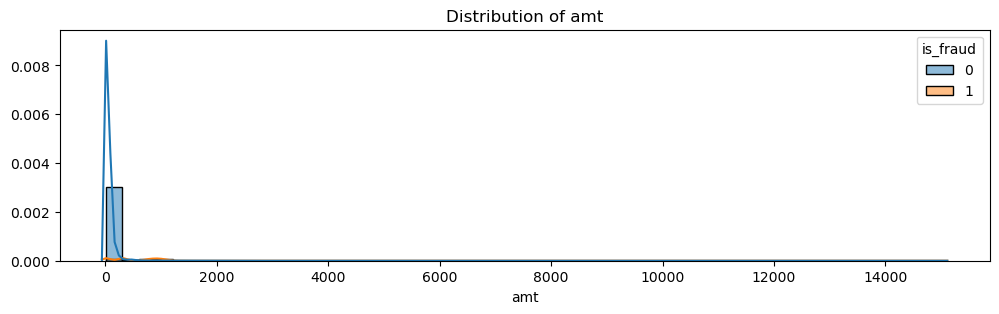

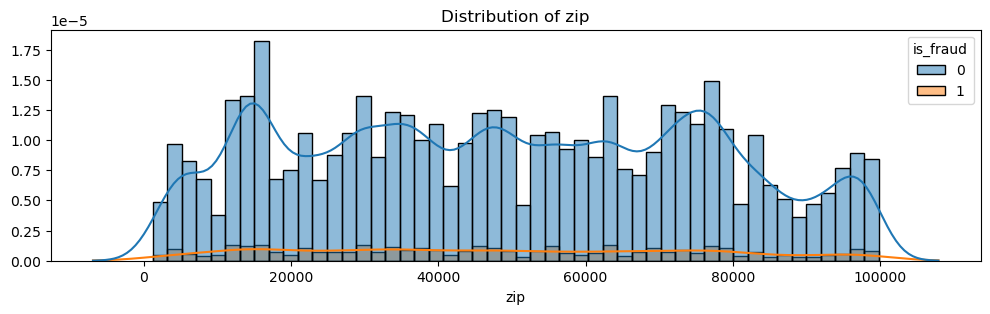

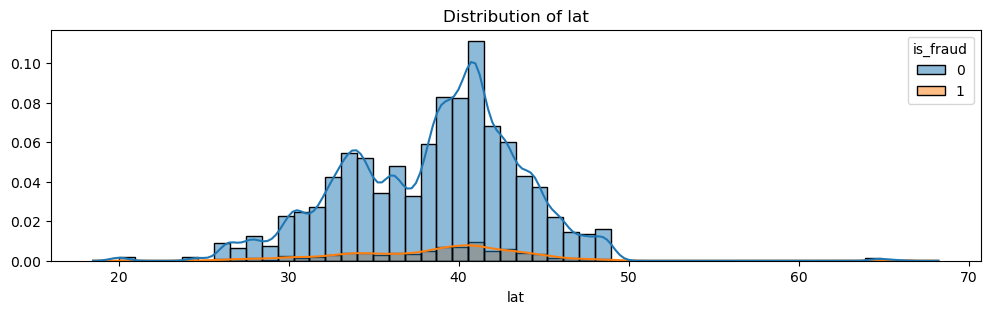

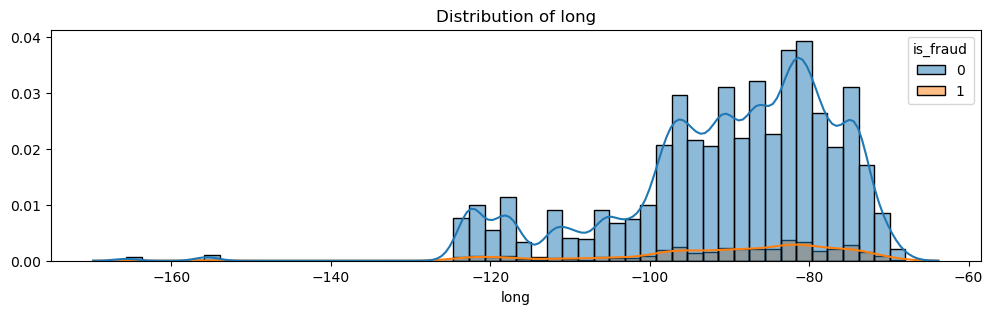

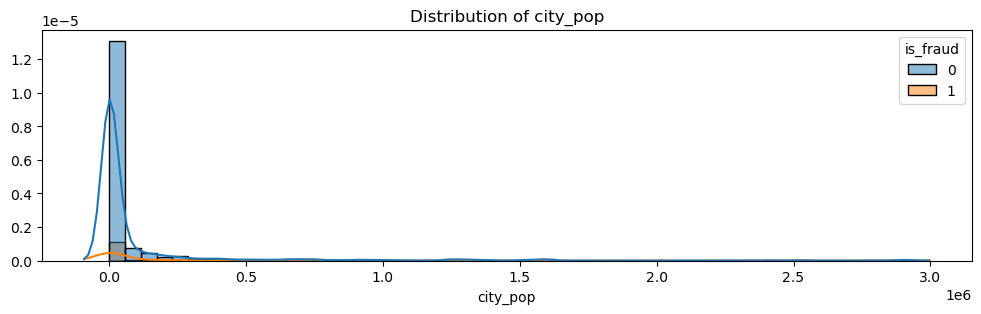

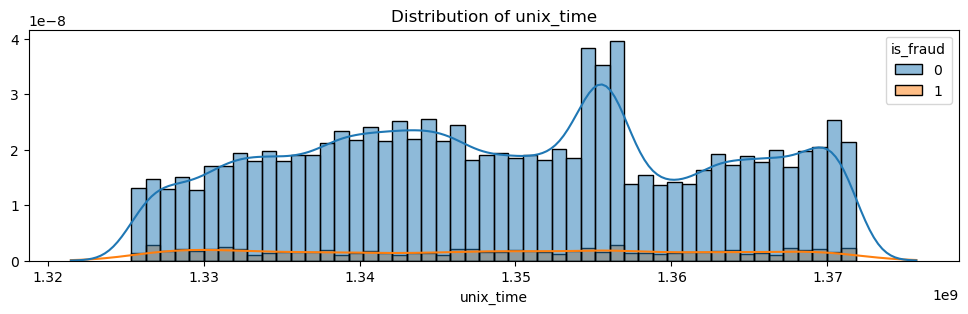

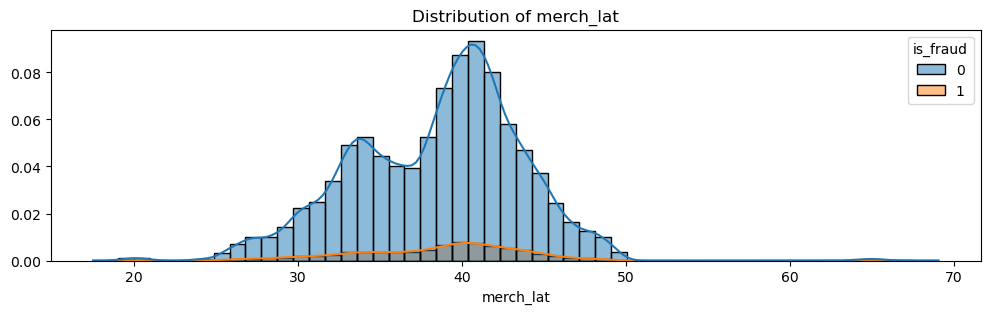

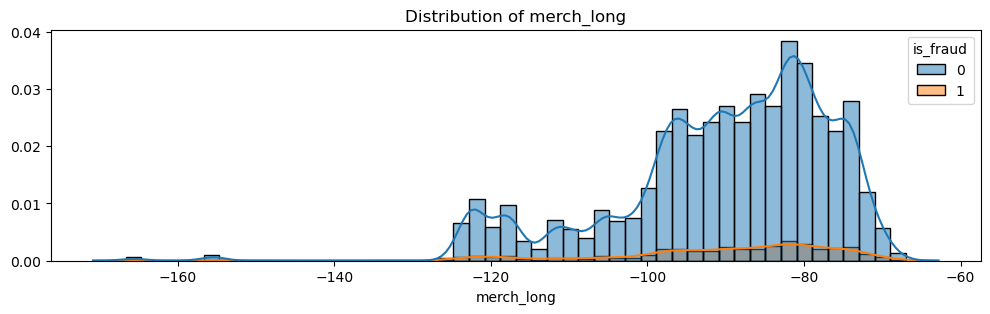

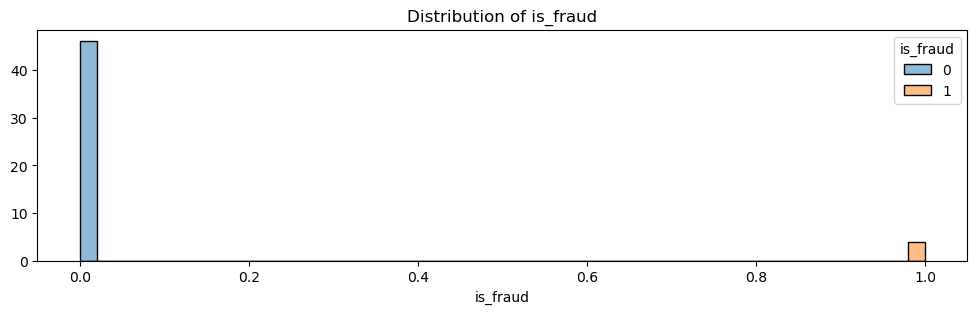

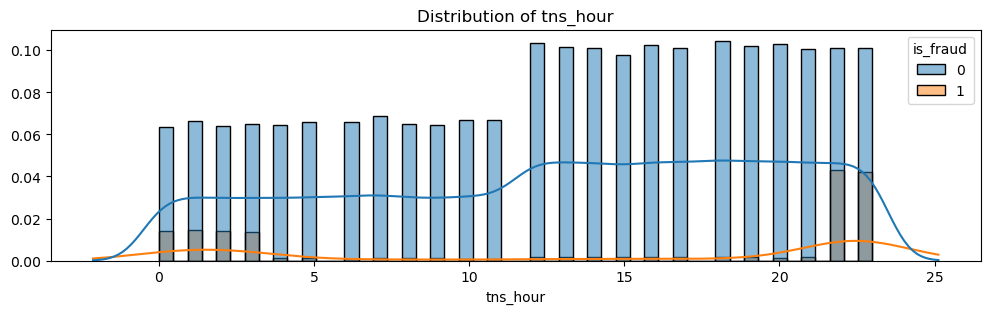

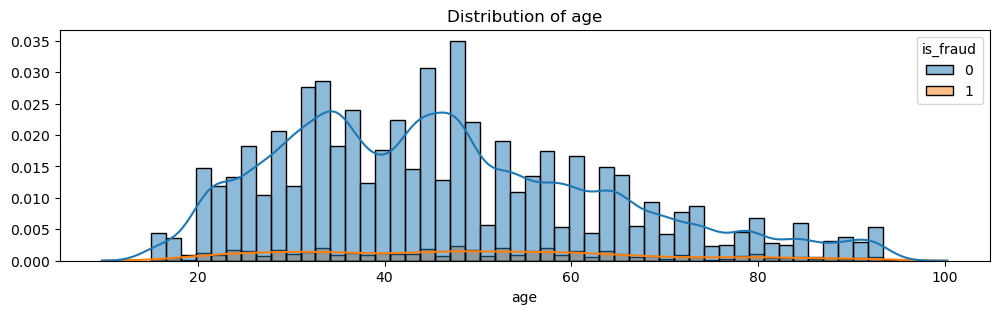

In [98]:
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(data=df, 
                 x=col,
                 kde=True, 
                 stat='density', 
                 kde_kws=dict(cut=3),
                 hue='is_fraud',
                 bins=50)
    ax.set(ylabel='', title='Distribution of %s' % col)
    plt.show()

Fraudulent transactions mainly occur:
- with small amounts,
- in cities with small populations,
- highest in the lat 40 and long -80.
- usually occur in the time frame of 1-2am and 9-0pm.
- cardholder age ranges, slightly higher in the 30-35 and 45-50 age groups

### Category columns

In [99]:
cate_cols = df.loc[:, df.dtypes == np.object_].columns.tolist()

for col in cate_cols:
    print(f"Unique values of {col}: {df[col].nunique()}")

Unique values of merchant: 693
Unique values of category: 14
Unique values of first: 352
Unique values of last: 481
Unique values of gender: 2
Unique values of street: 983
Unique values of city: 894
Unique values of state: 51
Unique values of job: 494


In [100]:
def count_percentage_tns(df, column, target, count):
    '''
    This function to create the table calculate the percentage of fraud/non-fraud transaction on total transaction group by category values

    '''
    # Create 2 dataframes of fraud and non-fraud
    fraud = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_fraud = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = fraud.merge(not_fraud, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'fraud',count+'_y':'not_fraud'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['fraud']/(cate_df['fraud']+cate_df['not_fraud'])

    return cate_df

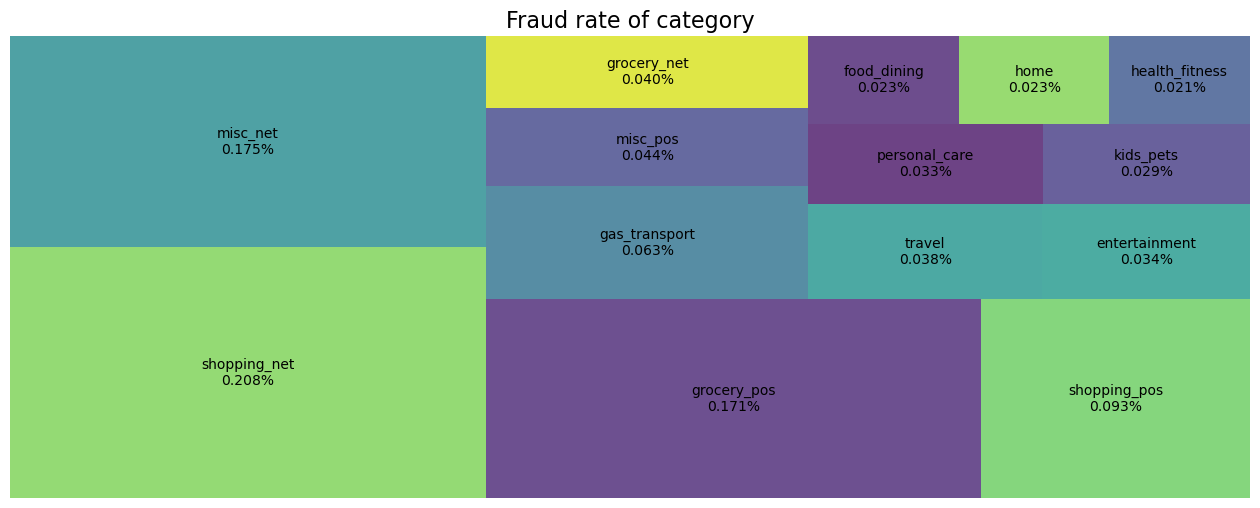

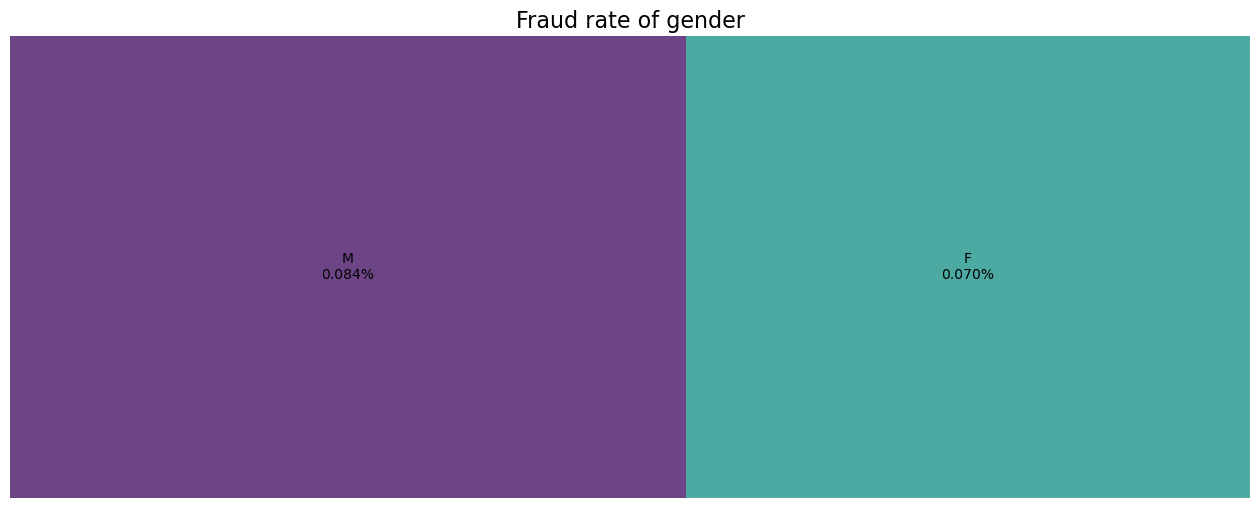

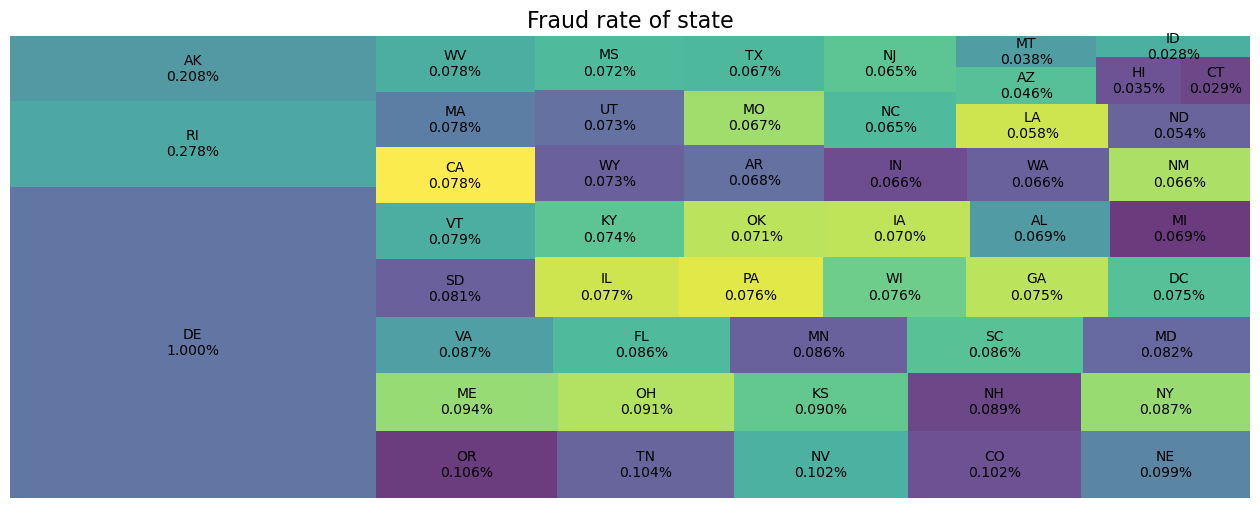

In [101]:
for col in ['category', 'gender', 'state']:
    fig, ax = plt.subplots(figsize=(16,6))
    cnt_perc = count_percentage_tns(df, col, 'is_fraud', 'is_fraud').sort_values(by='%', ascending=False)

    data_perc = cnt_perc[cnt_perc['%'] != 0]
    labels = data_perc[col] + '\n' + data_perc['%'].apply(lambda x:f'{x:.3f}%')

    squarify.plot(sizes=data_perc['%'], alpha=.8, label = labels)
    ax.set_title('Fraud rate of %s' % col, fontsize=16)
    plt.axis('off')
    plt.show()

- category: high fraud rate found in shopping_net (0.2%), mist_net (0.18%), groccery_pos (0.17%) and shopping_pos (0.1%) category
- state DE having high rate fraud (100%)

## e. Bivariate and Multivariate Analysis

<Axes: >

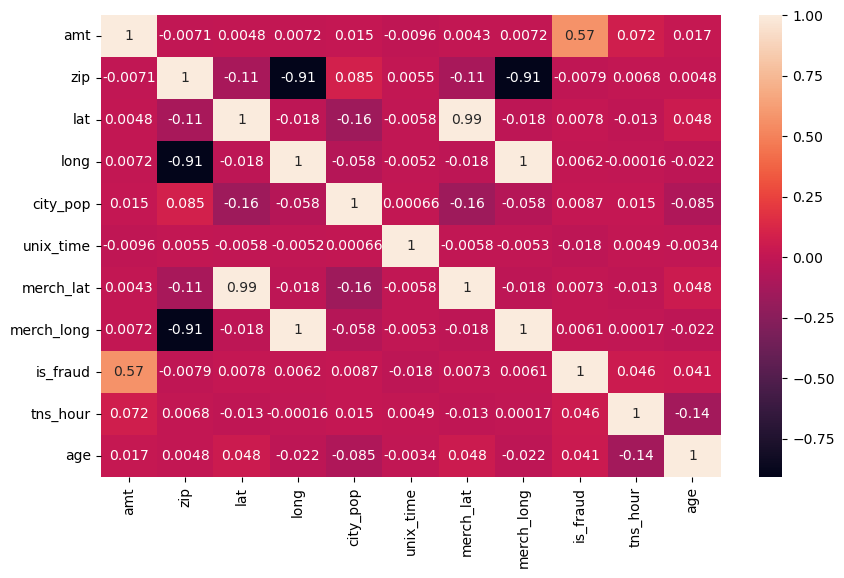

In [102]:
#Correlation:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.heatmap(df.corr(numeric_only=True), annot = True)

Focus on high corr feature: amt, unix_time, tns_hour, age

## f. Target Variable Analysis

In [103]:
fraud = df[df['is_fraud']==1]
valid = df[df['is_fraud']==0]

outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['is_fraud'] == 0])))

0.08317634804193169
Fraud Cases: 7506
Valid Transactions: 90242


Only 8.3% fraudulent transaction out all the transactions. The data is quite imbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset.

## g. Feature Engineering

#### Select potential features:

In [104]:
df_model= df[['category','amt', 'tns_hour', 'age','unix_time','is_fraud']]
df_model

,category,amt,tns_hour,age,unix_time,is_fraud
0,grocery_pos,281.06,1,31,1325466397,1
1,gas_transport,11.52,1,59,1325468849,1
2,grocery_pos,276.31,3,59,1325473523,1
3,gas_transport,7.03,3,31,1325475483,1
4,grocery_pos,275.73,3,59,1325476547,1
...,...,...,...,...,...,...
97743,health_fitness,9.86,18,65,1344278439,0
97744,food_dining,40.46,19,57,1328641480,0
97745,home,74.66,16,47,1353859579,0
97746,kids_pets,50.78,20,31,1340741873,0


# 2. Feature Transforming

In [106]:
list_columns = ['category']
df_encoded = pd.get_dummies(df_model, columns = list_columns)

In [107]:
df_encoded.head()

,amt,tns_hour,age,unix_time,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,281.06,1,31,1325466397,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,11.52,1,59,1325468849,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,276.31,3,59,1325473523,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,7.03,3,31,1325475483,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,275.73,3,59,1325476547,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False


# 3. Model Training

## a. Split train/validate/test set

In [108]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('is_fraud', axis = 1) #list of features
y=df_encoded[['is_fraud']] #target


x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of validate set: {len(x_val)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 68423
Number data of validate set: 14662
Number data of test set: 14663


## b. Normalization for each set

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## c. Apply Model

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13601
           1       0.90      0.91      0.91      1061

    accuracy                           0.99     14662
   macro avg       0.95      0.95      0.95     14662
weighted avg       0.99      0.99      0.99     14662

RandomForestClassifier(max_depth=15, random_state=0)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13601
           1       0.96      0.87      0.91      1061

    accuracy                           0.99     14662
   macro avg       0.97      0.94      0.95     14662
weighted avg       0.99      0.99      0.99     14662

LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13601
           1       0.89      0.51      0.65      1061

    accuracy                           0.96     14662
   macro avg   

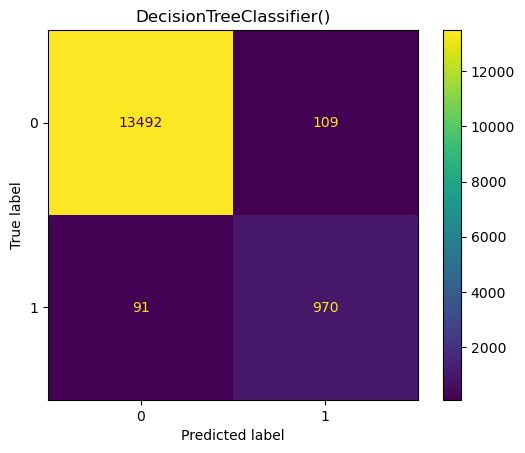

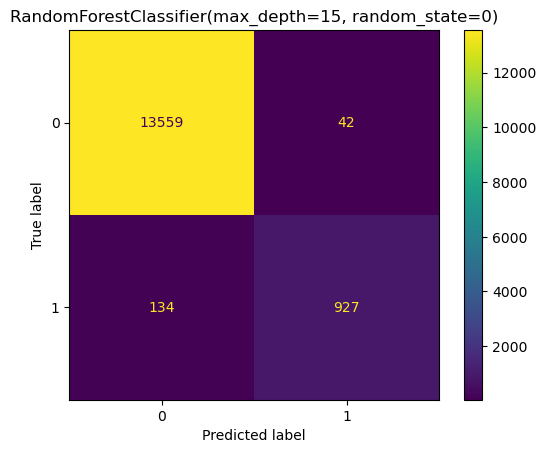

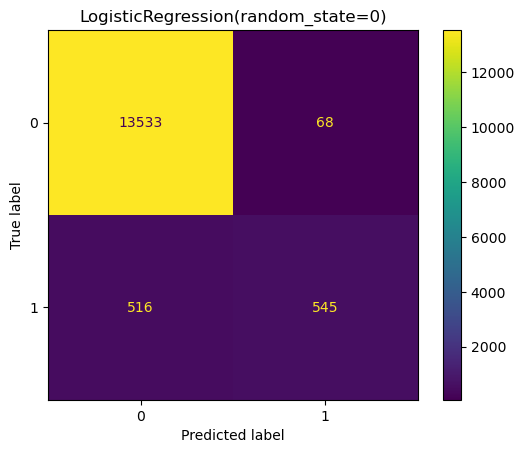

In [131]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
# Random Forest
rf = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)
# Logistic Regression
lr = LogisticRegression(random_state = 0)

compare = []

for model in (dtc, rf, lr):
    model.fit(x_val_scaled, y_val.values.ravel())
    model.fit(x_train_scaled, y_train.values.ravel())

    y_pred_train = model.predict(x_train_scaled)
    y_pred_val = model.predict(x_val_scaled)

    # Model Evaluation
    bal_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
    bal_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)

    compare.append({'model': model, 'bal_accuracy_train': bal_accuracy_train, 'bal_accuracy_val': bal_accuracy_val})
    
    print(model)
    print(classification_report(y_val, y_pred_val))

    cm = confusion_matrix(y_val, y_pred_val, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    disp.ax_.set_title(model)



In [135]:
table = pd.DataFrame(compare)
table

,model,bal_accuracy_train,bal_accuracy_val
0,DecisionTreeClassifier(),1.000000,0.953109
1,"(DecisionTreeClassifier(max_depth=15, max_feat...",0.966483,0.935308
2,LogisticRegression(random_state=0),0.750391,0.754333


Decision Tree Classifier has the highest test accuracy.
So, we can deduce that the decision tree classifier has the best prediction performance